In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk # import nltk
from nltk.corpus import stopwords
nltk.download('stopwords') # Download the stopwords resource
stop_words = set(stopwords.words('english'))
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
import pandas as pd

df = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='skip')  # Replace 'error_bad_lines' with 'on_bad_lines' and set to 'skip' to ignore bad lines
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [12]:
df.shape

(22912, 2)

In [13]:
df.info

<bound method DataFrame.info of                                                   review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
22907  Set in Bam Margera's hometown of Westchester P...  positive
22908  To understand "Crash Course" in the right cont...  positive
22909  Shaggy, friendly yet frustrating film has the ...  negative
22910  I'm not really sure where to begin. From start...  negative
22911  There are few uplifting things to say about th...  negative

[22912 rows x 2 columns]>

<function matplotlib.pyplot.show(close=None, block=None)>

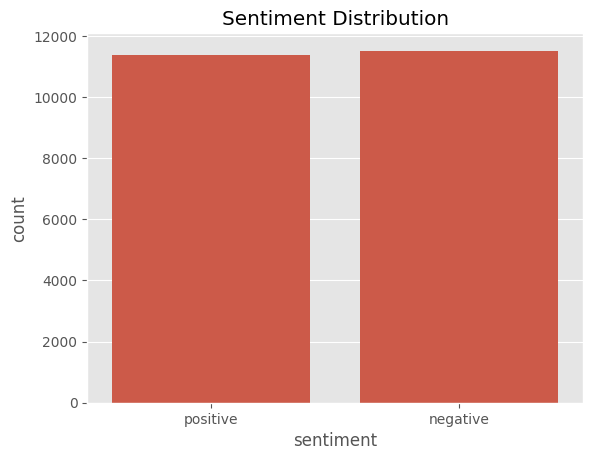

In [14]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show

In [15]:
for i in range(10):
  print(df['review'][i])
  print(df['review'].iloc[i])
  print("Sentiment:", df['sentiment'].iloc[i], "\n\n")

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [16]:
def no_of_words(text):
  return len(text.split())

df['no_of_words'] = df['review'].apply(no_of_words)

In [17]:
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))

In [18]:
df.head()

,review,sentiment,no_of_words,word_count
0,One of the other reviewers has mentioned that ...,positive,307,307
1,A wonderful little production. <br /><br />The...,positive,162,162
2,I thought this was a wonderful way to spend ti...,positive,166,166
3,Basically there's a family where a little boy ...,negative,138,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230,230


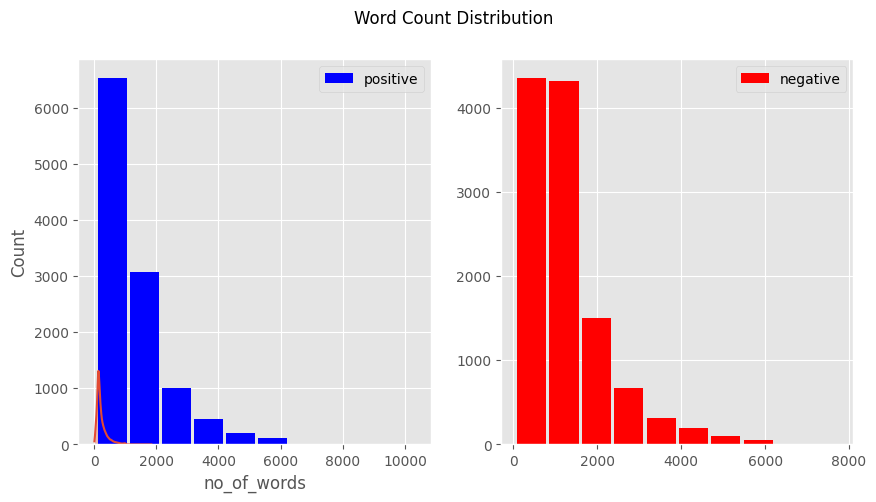

In [26]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.histplot(data=df,x='no_of_words',kde=True,ax=ax[0])
ax[0].hist(df[df['sentiment']=='positive']['review'].str.len(),label='positive',color='blue',rwidth=0.9) # Removed 'word_count' indexing
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment']=='negative']['review'].str.len(),label='negative',color='red',rwidth=0.9) # Removed 'word_count' indexing
ax[1].legend(loc='upper right');
fig.suptitle('Word Count Distribution')
plt.show()

In [28]:
df.sentiment.replace({ "positive": 1, "negative": 2 }, inplace=True)

In [29]:
df.head()

,review,sentiment,no_of_words,word_count
0,One of the other reviewers has mentioned that ...,1,307,307
1,A wonderful little production. <br /><br />The...,1,162,162
2,I thought this was a wonderful way to spend ti...,1,166,166
3,Basically there's a family where a little boy ...,2,138,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230,230


In [32]:
!pip install nltk
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
def data_preprocessing(text):
  text=text.lower()
  text=re.sub(r'[^a-zA-Z]',' ',text)
  text=re.sub(r"https\s+|www\s+|http\s+",' ',text,flags=re.MULTILINE)
  text=re.sub(r'\@w+|\#',' ',text)
  text=re.sub(r'[^\w\s]',' ',text)
  text_tokens=word_tokenize(text)
  filtered_tokens=[word for word in text_tokens if word not in stop_words]
  return " ".join(filtered_tokens) # Use filtered_tokens instead of filtered_text

In [36]:
df.review=df.review.apply(data_preprocessing)

In [37]:
duplicated_count = df.duplicated().sum()
print("Number of duplicated rows:", duplicated_count)

Number of duplicated rows: 93


In [38]:
df= df.drop_duplicates('reviews')

In [39]:
stemmer= PorterStemmer()
def stemming(text):
  text=stemmer.stem(text)
  return text

In [42]:
df.review=df['review'].apply(lambda x: stemming(x))

<ipython-input-42-3b0bb049dca1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.review=df['review'].apply(lambda x: stemming(x))


In [45]:
df['no_of_words'] = df['review'].apply(no_of_words)
df.head()

<ipython-input-45-4921620a8ed8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_of_words'] = df['review'].apply(no_of_words)


,review,sentiment,no_of_words,word_count
0,one reviewers mentioned watching oz episode ho...,1,168,307
1,wonderful little production br br filming tech...,1,92,162
2,thought wonderful way spend time hot summer we...,1,88,166
3,basically family little boy jake thinks zombie...,2,70,138
4,petter mattei love time money visually stunnin...,1,133,230


In [46]:
positive_reviews = df[df['sentiment'] == 1]
positive_reviews.head()

,review,sentiment,no_of_words,word_count
0,one reviewers mentioned watching oz episode ho...,1,168,307
1,wonderful little production br br filming tech...,1,92,162
2,thought wonderful way spend time hot summer we...,1,88,166
4,petter mattei love time money visually stunnin...,1,133,230
5,probably time favorite movie story selflessnes...,1,54,119


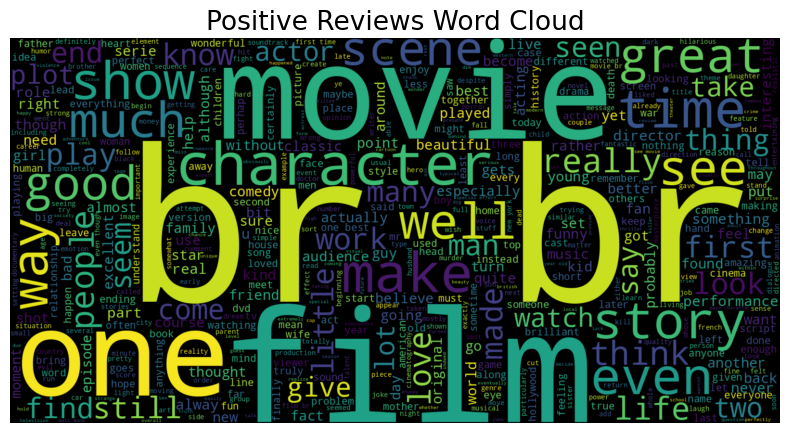

In [49]:
text= " ".join(review for review in positive_reviews.review)
plt.figure(figsize=(10,5),facecolor='none')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud',fontsize=19)
plt.show()

In [11]:
from collections import Counter

# Assuming 'df' is your DataFrame and 'review' is the column containing reviews
count = Counter()
for i in df['review']:
    for word in i.split():
        count[word] += 1

# Get the top 10 most common words
most_common_words = count.most_common(10)
print(most_common_words)


[('the', 568735), ('a', 306960), ('and', 301919), ('of', 283625), ('to', 261850), ('is', 203056), ('in', 169981), ('I', 132498), ('that', 126818), ('this', 113726)]


In [15]:
positive_reviews = pd.DataFrame(count.most_common(10))
positive_reviews.columns = ['word', 'count']
positive_reviews.head()


,word,count
0,the,568735
1,a,306960
2,and,301919
3,of,283625
4,to,261850


In [17]:
!pip install plotly_express
import plotly.express as px

In [19]:
px.bar(positive_reviews, x='word', y='count', title=' Common Words in Positive Reviews',color='word')

In [21]:
negative_reviews = df[df['sentiment'] == 2]
negative_reviews.head()

,review,sentiment


In [25]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud # Import the WordCloud class

# Check if negative_reviews is empty
if negative_reviews.empty:
    print("No negative reviews found. Cannot generate word cloud.")
else:
    text= " ".join(review for review in negative_reviews.review)
    plt.figure(figsize=(10,5),facecolor='none')
    wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Reviews Word Cloud',fontsize=19)
    plt.show()

No negative reviews found. Cannot generate word cloud.


In [27]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

vect= TfidfVectorizer()
X=vect.fit_transform(df['review'])

In [29]:
!pip install scikit-learn
from sklearn.model_selection import train_test_split # Import the train_test_split function
x_train, x_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

In [31]:
print("size of x_train:", x_train.shape)
print("size of x_test:", x_test.shape)
print("size of y_train:", y_train.shape)
print("size of y_test:", y_test.shape)

size of x_train: (40000, 101895)
size of x_test: (10000, 101895)
size of y_train: (40000,)
size of y_test: (10000,)


In [32]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix # Import accuracy_score and confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [35]:
logreg= LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred= logreg.predict(x_test)
logreg_acc= accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_acc)

Logistic Regression Accuracy: 0.9005


In [37]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.naive_bayes import MultinomialNB # Import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Import accuracy_score, confusion_matrix and classification_report
import warnings
warnings.filterwarnings('ignore')

In [38]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[4406  555]
 [ 440 4599]]


              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [41]:
mnb= MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred= logreg.predict(x_test)
mnb_acc= accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", mnb_acc)

Logistic Regression Accuracy: 0.9005


In [40]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[4406  555]
 [ 440 4599]]


              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [44]:
from sklearn.svm import LinearSVC # Import LinearSVC

svc= LinearSVC()
svc.fit(x_train, y_train)
svc_pred= logreg.predict(x_test)
svc_acc= accuracy_score(y_test, logreg_pred)
print("Logistic Regression Accuracy:", svc_acc)

Logistic Regression Accuracy: 0.9005


In [45]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[4406  555]
 [ 440 4599]]


              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [61]:
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge']
}

grid_search = GridSearchCV(svc, param_grid, refit=True, verbose=3)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.883 total time=   0.9s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.880 total time=   1.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.881 total time=   0.8s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   1.2s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.881 total time=   1.1s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.898 total time=   1.6s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.896 total time=   0.9s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.898 total time=   0.9s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.9s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   1.2s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.899 total time=   1.2s
[CV 2/5] END ...................C=1, loss=hinge;,

In [53]:
print("best cross validation score:{:.2f}".format(grid_search.best_score_))
print("best parameters:", best_params)

best cross validation score:0.90
best parameters: {'C': 10, 'penalty': 'l2'}


In [57]:
from sklearn.svm import LinearSVC # Import LinearSVC

svc= LinearSVC(C=1, loss='hinge') # Use uppercase 'C' for regularization parameter
svc.fit(x_train, y_train)
svc_pred= svc.predict(x_test) # Predict using the svc model, not logreg
svc_acc= accuracy_score(y_test, svc_pred)
print("Logistic Regression Accuracy:", svc_acc)

Logistic Regression Accuracy: 0.9066


In [55]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[4406  555]
 [ 440 4599]]


              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

